In [1]:
# Load packages
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Verify Opencv version
print(cv2.__version__)

3.1.0


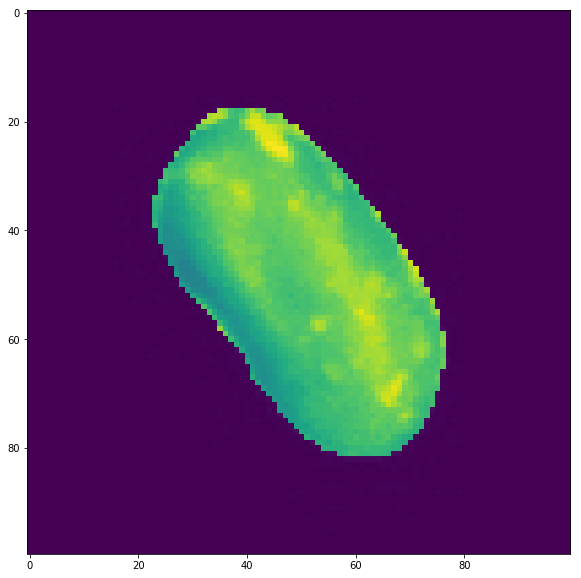

In [2]:
# Load test image and convert it to grayscale
img = cv2.imread('/Users/haachicanoy/Documents/Data/Computer_vision/clear_bckg/_img_sgmn/18ACA03060_000/18ACA03060_000_8.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # 0.299*R + 0.587*G + 0.114*B

# Plot grayscale image
plt.figure(figsize=(20,10))
plt.imshow(gray)
plt.show()

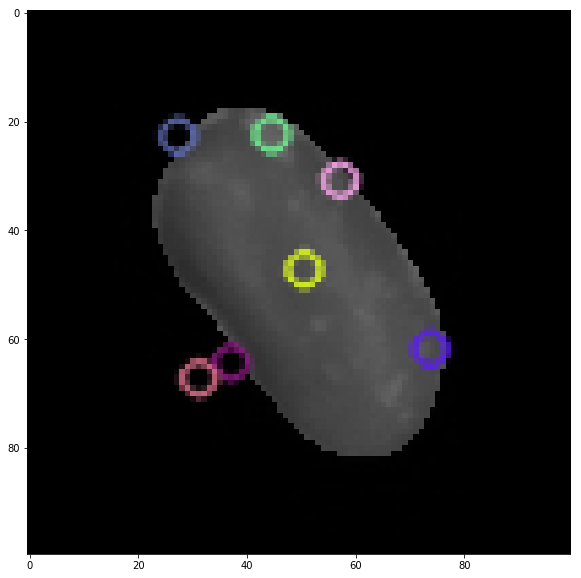

In [3]:
# SIFT opencv implementation
sift = cv2.xfeatures2d.SIFT_create()
kp   = sift.detect(gray, None)
img2 = cv2.drawKeypoints(gray, kp, img)

# Plot SIFT keypoints over image
plt.figure(figsize=(20,10))
plt.imshow(img2)
plt.show()

## cv2.imwrite('/Users/haachicanoy/Documents/Data/Computer_vision/sift_keypoints.jpg', img2)
## img = cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
## cv2.imwrite('/Users/haachicanoy/Documents/Data/Computer_vision/sift_keypoints2.jpg',img)

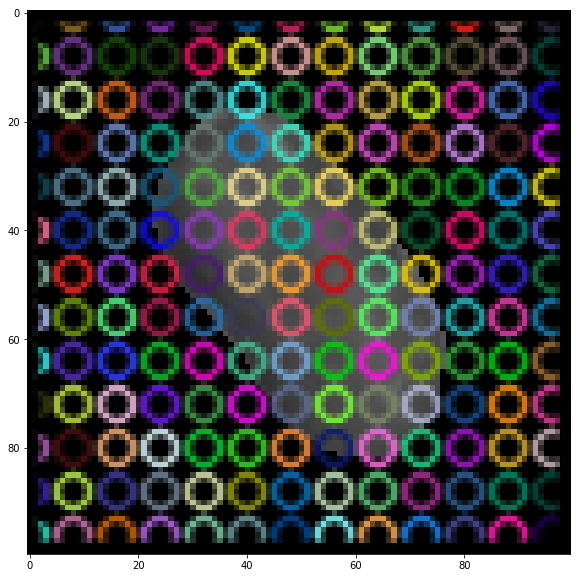

(169, 128)


In [11]:
# Dense SIFT
sift = cv2.xfeatures2d.SIFT_create()

step_size = 8
kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, gray.shape[0], step_size) 
                                    for x in range(0, gray.shape[1], step_size)]

img3 = cv2.drawKeypoints(gray, kp, img)

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

dense_feat = sift.compute(gray, kp)

print(dense_feat[1].shape)

In [ ]:
# Dense SIFT function
def dense_sift(gray_img, step_size):
    # SIFT calculator
    sift = cv2.xfeatures2d.SIFT_create()
    # Define step size
    kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, gray.shape[0], step_size)
                                        for x in range(0, gray.shape[1], step_size)]
    kp, desc = sift.compute(gray_img, kp)
    return kp, desc

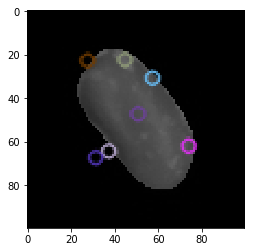

In [47]:
# Apply SIFT features over complete image
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# Generate SIFT keypoints and descriptors
img_kp, img_desc = gen_sift_features(gray)

show_sift_features(gray, img, img_kp);

In [48]:
# Feature vector extracted in the first position
print(img_desc[0])
print(img_kp)

[ 30.   1.   0.   0.   0.   0.   0.   4. 189.  14.   0.   0.   0.   0.
   0.  36. 150.   8.   0.   0.   0.   0.   0.  28.  39.   6.   0.   0.
   0.   0.   0.  21.  50.   1.   0.   0.   0.   0.   0.   4. 189.  15.
   0.   0.   0.   0.   0.  40. 150.  10.   2.   1.   0.   0.   2.  38.
  48.  19.   0.   0.   0.   0.   0.   2.  42.   5.   0.   0.   0.   0.
   0.   1. 189.  47.   0.   0.   0.   0.   0.   1. 156.  32.   7.   2.
   0.   0.   0.   2.  57.  16.   2.   0.   0.   0.   0.   2.  25.   3.
   0.   0.   0.   0.   0.   0. 189.  32.   0.   0.   0.   0.   0.   1.
 152.  12.   0.   0.   0.   0.   2.  29.  19.   4.   1.   0.   0.   4.
   9.  22.]
[<KeyPoint 0x1a18bdeb70>, <KeyPoint 0x1a18bde8d0>, <KeyPoint 0x1a18bde9f0>, <KeyPoint 0x1a18bde900>, <KeyPoint 0x1a18bdea50>, <KeyPoint 0x1a18bdeae0>, <KeyPoint 0x1a18bdec30>]


In [34]:
def explain_keypoint(kp):
    print('angle\n', kp.angle)
    print('\nclass_id\n', kp.class_id)
    print('\noctave (image scale where feature is strongest)\n', kp.octave)
    print('\npt (x,y)\n', kp.pt)
    print('\nresponse\n', kp.response)
    print('\nsize\n', kp.size)

print('This is an example of a single SIFT keypoint:\n* * *')
explain_keypoint(img_kp[0])

This is an example of a single SIFT keypoint:
* * *
angle
 138.76510620117188

class_id
 -1

octave (image scale where feature is strongest)
 10027775

pt (x,y)
 (57.03812026977539, 30.748638153076172)

response
 0.01970093324780464

size
 2.5995213985443115


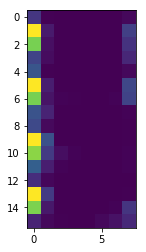

In [35]:
# Visualize feature vector in another way:
plt.imshow(img_desc[0].reshape(16,8), interpolation='none');

In [36]:
# Create image patches for doing dense SIFT
from sklearn.feature_extraction import image
patches = image.extract_patches_2d(gray, (16, 16))

373


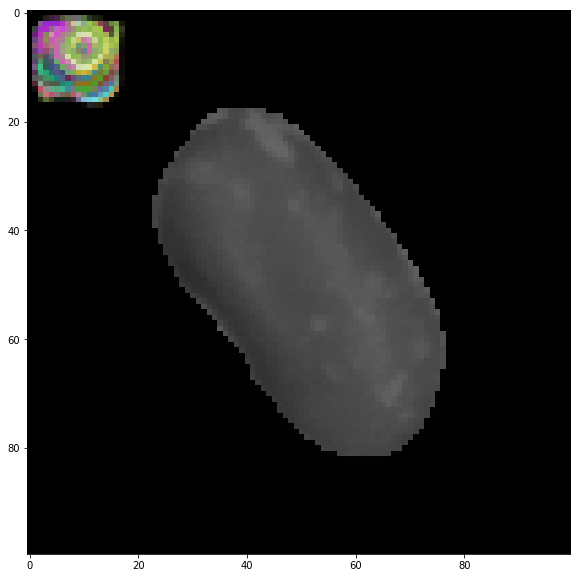

In [79]:
# Generate SIFT keypoints and descriptors for image patches
img_kp   = [None]*len(patches)
img_desc = [None]*len(patches)
for i in range(0, len(patches)):
    img_kp[i], img_desc[i] = gen_sift_features(patches[i])

def remove_empty_lists(l):
    keep_going = True
    prev_l = l
    while keep_going:
        #call remover on the list
        new_l = remover(prev_l)
        #are they identical objects?
        if new_l == prev_l:
            keep_going = False
        #set prev to new
        prev_l = new_l
    #return the result
    return new_l

def remover(l):
    #new list
    newlist = []
    #loop over elements
    for i in l:
        #pdb.set_trace()
        #is element a non-empty list? then call self on it
        if isinstance(i, list) and len(i) != 0:
            newlist.append(remover(i))
        #if not a list
        if not isinstance(i, list):
            newlist.append(i)
    
    #return newlist
    return newlist

img_kp   = remove_empty_lists(img_kp)
img_desc = [x for x in img_desc if x is not None]

img_kp   = [item for sublist in img_kp for item in sublist]

print(len(img_kp))

plt.figure(figsize=(20,10))
show_sift_features(gray, img, img_kp)

# img_kp, img_desc = gen_sift_features(patches[2000])
# print(len(img_kp))
# print(img_desc)
# plt.figure(figsize=(20,10))
# show_sift_features(patches[2000], img, img_kp)